#### Read data

In [1]:
import sys
import csv
import glob
import pandas as pd

# get data file names
path =r'./files'
filenames = glob.glob(path + "/*")
filenames.sort(reverse=True)

dfs = {}
names = []
for file in filenames: 
    name = file[8:21]
    names.append(name)
    df = pd.read_excel(file)
    dfs[name] = df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [2]:
print(names[0])
dfs[names[0]].head()

TOP500_202011


,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
1,2,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
2,3,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398
3,4,4.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,...,None,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,50623,178764
4,5,7.0,55,7,Selene,"NVIDIA DGX A100, AMD EPYC 7742 64C 2.25GHz, NV...",NVIDIA Corporation,Nvidia,United States,2020,...,NVIDIA A100,64,AMD Rome,NVIDIA DGX A100,NVIDIA DGX,Infiniband,Mellanox HDR Infiniband,North America,48448,179842


#### Explore data

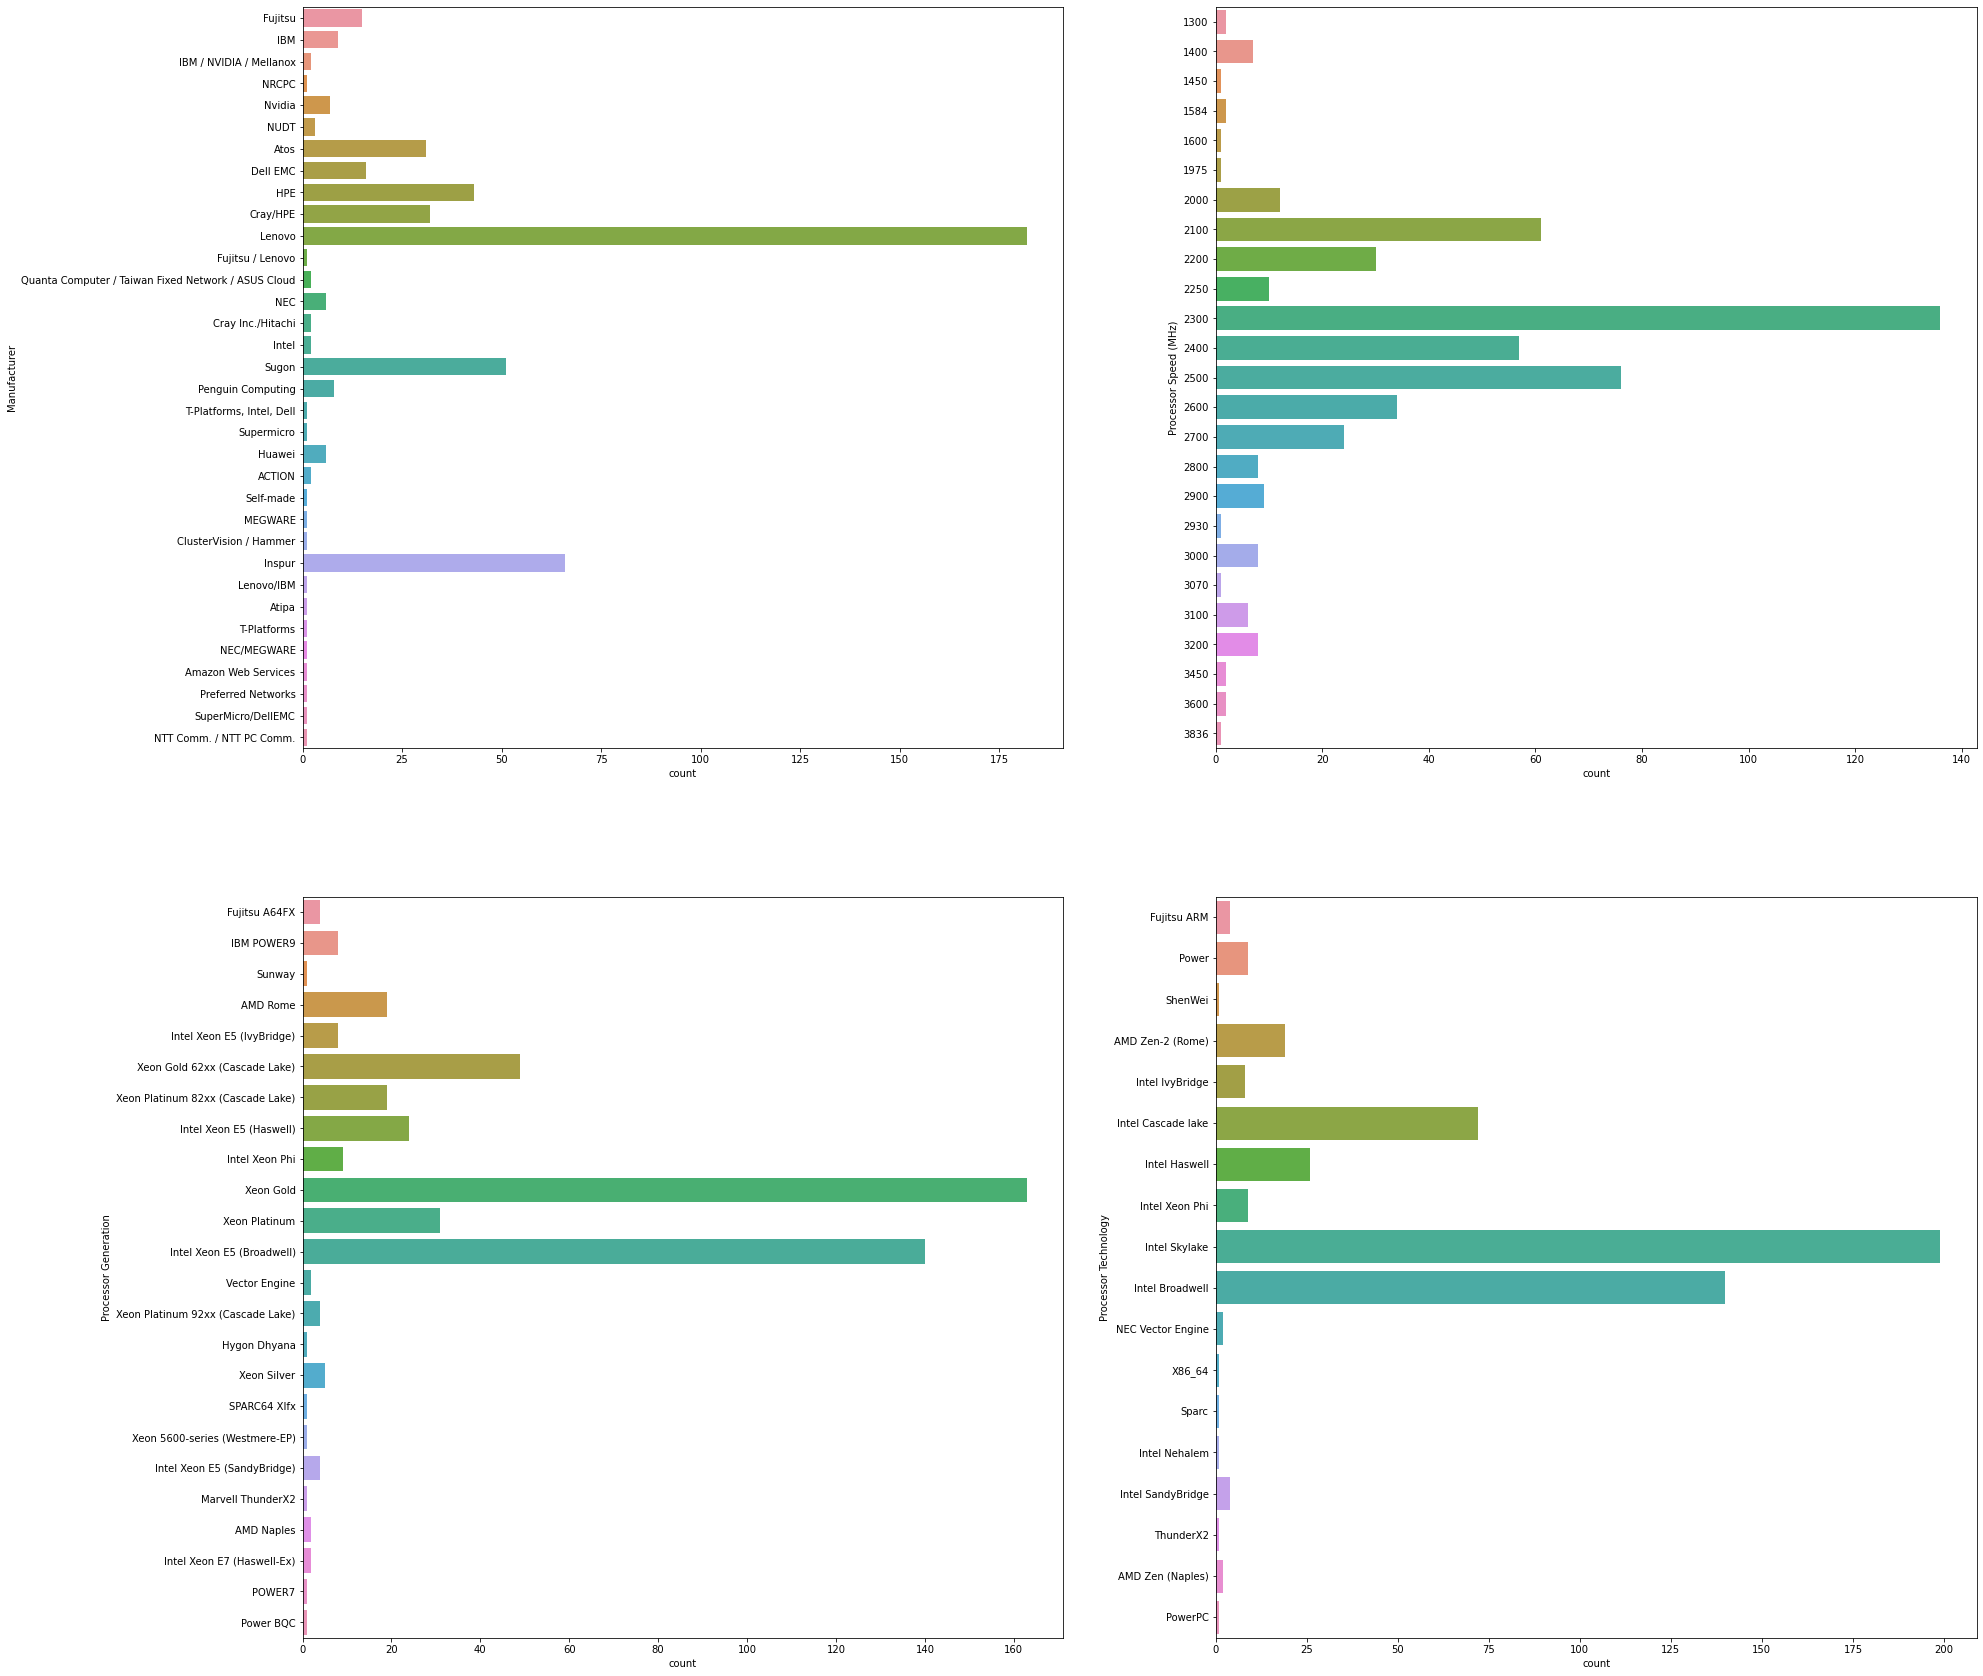

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))

columns_to_show = ["Manufacturer", "Processor Speed (MHz)", "Processor Generation", "Processor Technology"]
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    g = sns.countplot(y=columns_to_show[i], data=dfs['TOP500_202011'])

Text(0, 0.5, 'Rmax')

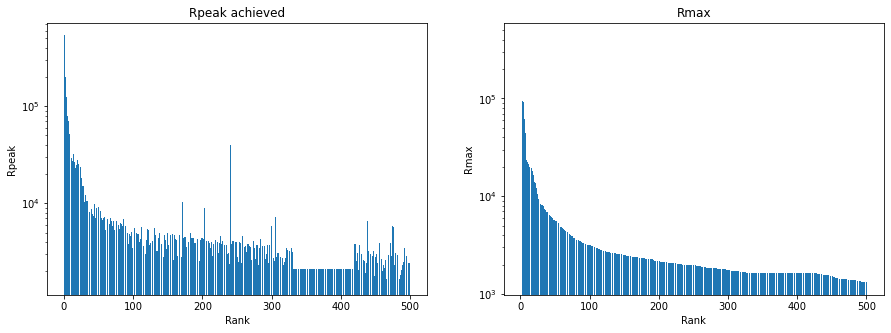

In [4]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 2, 1).set_title("Rpeak achieved")
plt.bar(dfs['TOP500_202011']["Rank"], dfs['TOP500_202011']["Rpeak [TFlop/s]"])
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Rpeak')

fig.add_subplot(1, 2, 2).set_title("Rmax")
plt.bar(dfs['TOP500_202011']["Rank"], dfs['TOP500_202011']["Rmax [TFlop/s]"])
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Rmax')


#### Clean data

In [5]:
# Some dataframes miss the columns
dfs_to_fix_columns = ['TOP500_200706', 'TOP500_200511', 'TOP500_200506',
                      'TOP500_200606', 'TOP500_200711', 'TOP500_200611']

for i in range(len(dfs_to_fix_columns)):
    dfs[dfs_to_fix_columns[i]].columns = dfs[dfs_to_fix_columns[i]].loc[0]
    dfs[dfs_to_fix_columns[i]] = dfs[dfs_to_fix_columns[i]].drop([0])
    
cols_to_convert = ['TOP500_201706', 'TOP500_201806', 'TOP500_201906', 'TOP500_202006',
                   'TOP500_201711', 'TOP500_201811', 'TOP500_201911', 'TOP500_202011']

for i in range(len(cols_to_convert)):
    dfs[cols_to_convert[i]]['Rmax [TFlop/s]'] *= 1000 
    dfs[cols_to_convert[i]]['Rpeak [TFlop/s]'] *= 1000 

In [6]:
# Unify column names
for i in range(len(names)):
    for col in dfs[names[i]].columns:
        if col=='Rmax [TFlop/s]' or col=='RMax' or col=='Rmax':
            dfs[names[i]] = dfs[names[i]].rename(columns={col: "Rmax"})
        if col=='Rpeak [TFlop/s]' or col=='RPeak' or col=='Rpeak':
            dfs[names[i]] = dfs[names[i]].rename(columns={col: "Rpeak"})
        if col=='Proc. Frequency' or col=='Processor Speed (MHz)':
            dfs[names[i]] = dfs[names[i]].rename(columns={col: "Processor Speed"})
        if col=='Cores' or col=='Processors':
            dfs[names[i]] = dfs[names[i]].rename(columns={col: "Total Cores"})

In [7]:
# Add year and month 
for i in range(len(names)):
    year = names[i][-6:][:4]
    month = names[i][-6:][4:]
    d = '{}-{}'.format(year, month)
    dfs[names[i]]['Date'] = pd.to_datetime(d.replace("'","")) 
    dfs[names[i]]['idx'] = 32-i

In [8]:
# Combine top 10 from each dataframe
columns=['Date', 'idx', 'Rank', 'Rmax', 'Rpeak', 'Processor Speed', 'Total Cores']
data = pd.DataFrame(columns=columns)

for i in range(len(names)):
    data = data.append(dfs[names[i]][columns].head(10), ignore_index=True)

data

,Date,idx,Rank,Rmax,Rpeak,Processor Speed,Total Cores
0,2020-11-01,32,1,442010000.0,537212000.0,2200,7630848
1,2020-11-01,32,2,148600000.0,200794880.0,3070,2414592
2,2020-11-01,32,3,94640000.0,125712000.0,3100,1572480
3,2020-11-01,32,4,93014593.88,125435904.0,1450,10649600
4,2020-11-01,32,5,63460000.0,79215000.0,2250,555520
...,...,...,...,...,...,...,...
315,2005-06-01,1,6,27450,34406.4,700,12288
316,2005-06-01,1,7,19940,22938,1400,4096
317,2005-06-01,1,8,18200,22937.6,700,8192
318,2005-06-01,1,9,18200,22937.6,700,8192


#### Predict Rmax, Rpeak, Total Cores and Processor Speed in next 5 years

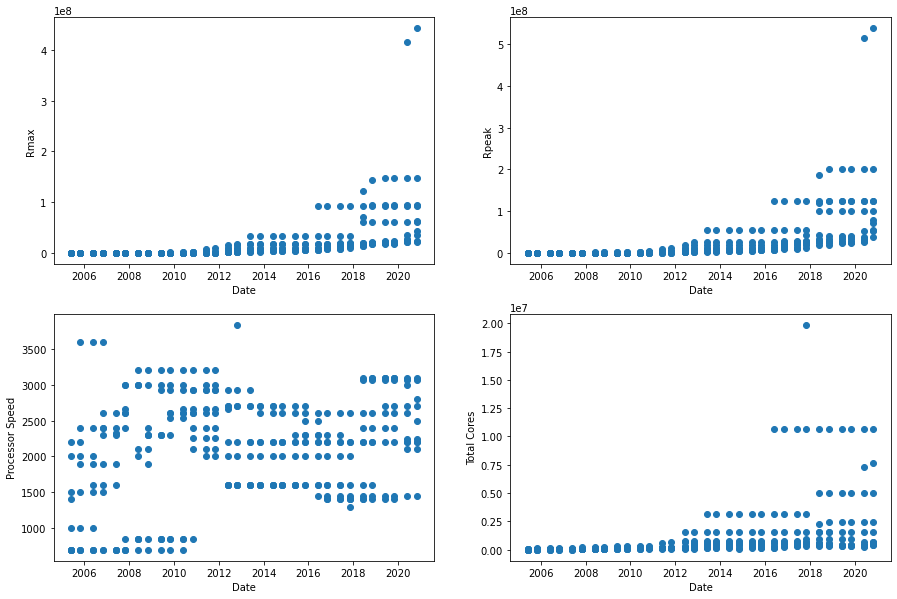

In [9]:
fig = plt.figure(figsize=(15,10))
columns_to_plot = ['Rmax', 'Rpeak', 'Processor Speed', 'Total Cores']
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plt.plot(data['Date'], data[columns_to_plot[i]], 'o');
    plt.xlabel('Date')
    plt.ylabel(columns_to_plot[i])

Text(0, 0.5, 'log(Rmax)')

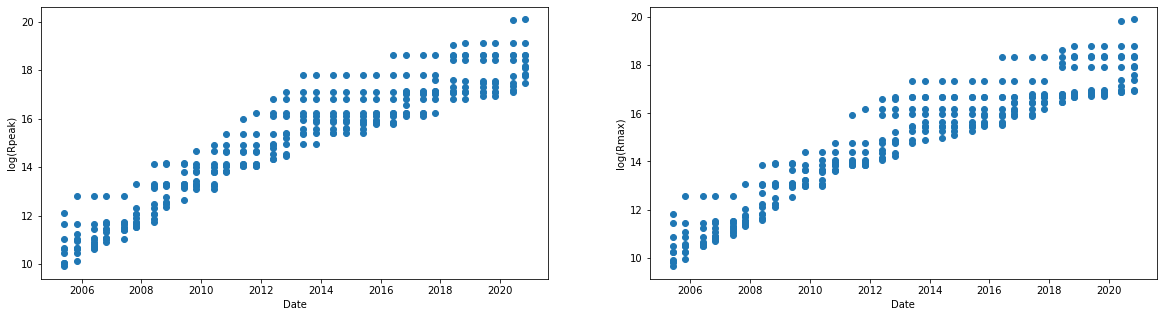

In [10]:
import numpy as np
rpeak = np.array(data["Rpeak"])
rmax = np.array(data["Rmax"])
rpeak_log = np.log(rpeak.astype(float))
rmax_log = np.log(rmax.astype(float))

fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 2, 1)
plt.plot(data['Date'], rpeak_log, 'o');
plt.xlabel('Date')
plt.ylabel('log(Rpeak)')

fig.add_subplot(1, 2, 2)
plt.plot(data['Date'], rmax_log, 'o');
plt.xlabel('Date')
plt.ylabel('log(Rmax)')

In [11]:
from sklearn.linear_model import LinearRegression
# Rpeak
X_train = np.array(data[["idx", "Rank"]])
y_train = rpeak_log
X_test = X_train[:100]
a = np.zeros(100)
for i in range(10):
    for j in range(10):
        a[10*i+j] = 33+i
X_test[:,0] = a
        
regr = LinearRegression()
regr.fit(X_train, y_train)
rpeak_pred = regr.predict(X_test)

#Rmax
y_train = rmax_log
regr.fit(X_train, y_train)
rmax_pred = regr.predict(X_test)

In [12]:
columns=['Date', 'idx', 'Rank', 'Rmax', 'Rpeak', 'Processor Speed', 'Total Cores']
next_years = ['2021-06', '2021-11', '2022-06', '2022-11', '2023-06',
              '2023-11', '2024-06', '2024-11', '2025-06', '2025-11']
data_pred = pd.DataFrame(index=range(100), columns=columns)
data_pred['Rank'] = data['Rank']
for i in range(10):
    for j in range(10):
        data_pred['Date'][10*i+j] = next_years[i]
        data_pred['idx'][10*i+j] = 33+i

data_pred['Rmax'] = np.exp(rmax_pred)
data_pred['Rpeak'] = np.exp(rpeak_pred)
data_pred

,Date,idx,Rank,Rmax,Rpeak,Processor Speed,Total Cores
0,2021-06,33,1,5.552619e+07,8.018417e+07,NaN,NaN
1,2021-06,33,2,4.477347e+07,6.451979e+07,NaN,NaN
2,2021-06,33,3,3.610303e+07,5.191553e+07,NaN,NaN
3,2021-06,33,4,2.911164e+07,4.177357e+07,NaN,NaN
4,2021-06,33,5,2.347413e+07,3.361290e+07,NaN,NaN
...,...,...,...,...,...,...,...
95,2025-11,42,6,7.780061e+07,1.148280e+08,NaN,NaN
96,2025-11,42,7,6.273443e+07,9.239580e+07,NaN,NaN
97,2025-11,42,8,5.058583e+07,7.434582e+07,NaN,NaN
98,2025-11,42,9,4.078982e+07,5.982199e+07,NaN,NaN


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Total Cores
X_train = np.array(data[["idx", "Rank", "Rmax", "Rpeak"]])
X_test = np.array(data_pred[["idx", "Rank", "Rmax", "Rpeak"]])
y_train = np.log(np.array(data["Total Cores"]).astype(float))
regr.fit(X_train, y_train)
pred_total_cores = regr.predict(X_test)
data_pred['Total Cores'] = np.exp(pred_total_cores)

# Processor Speed
X_train = np.array(data[["idx", "Rank", "Rmax", "Rpeak", "Total Cores"]])
X_test = np.array(data_pred[["idx", "Rank", "Rmax", "Rpeak", "Total Cores"]])
y_train = np.array(data["Processor Speed"])
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_proc_speed = rfr.predict(X_test)
data_pred['Processor Speed'] = pred_proc_speed

data_pred

,Date,idx,Rank,Rmax,Rpeak,Processor Speed,Total Cores
0,2021-06,33,1,5.552619e+07,8.018417e+07,1763.5,9.033687e+06
1,2021-06,33,2,4.477347e+07,6.451979e+07,2198.5,7.159280e+06
2,2021-06,33,3,3.610303e+07,5.191553e+07,2149.0,5.687353e+06
3,2021-06,33,4,2.911164e+07,4.177357e+07,2007.5,4.526687e+06
4,2021-06,33,5,2.347413e+07,3.361290e+07,1937.5,3.608400e+06
...,...,...,...,...,...,...,...
95,2025-11,42,6,7.780061e+07,1.148280e+08,1763.0,1.314234e+07
96,2025-11,42,7,6.273443e+07,9.239580e+07,1694.0,1.035176e+07
97,2025-11,42,8,5.058583e+07,7.434582e+07,1724.5,8.183170e+06
98,2025-11,42,9,4.078982e+07,5.982199e+07,2014.0,6.487581e+06


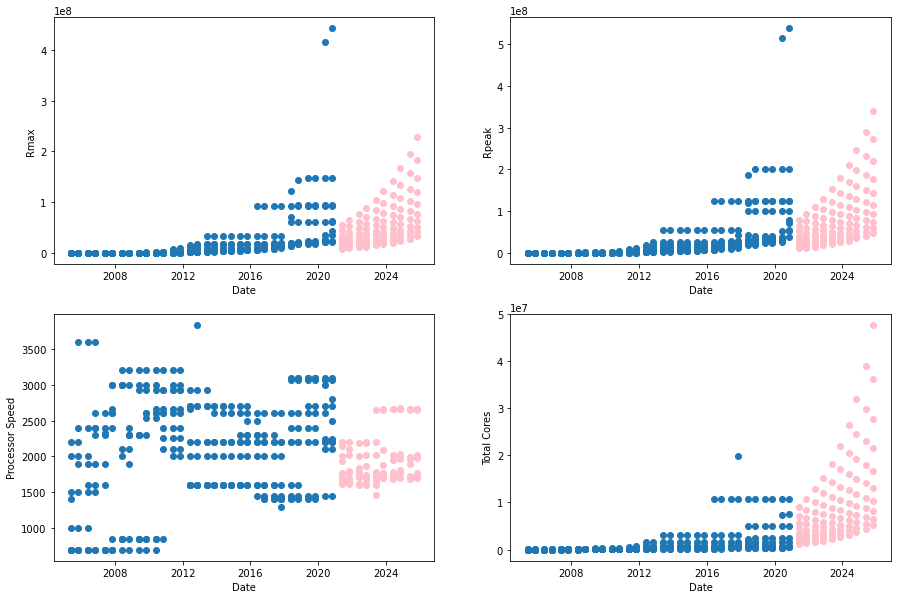

In [14]:
fig = plt.figure(figsize=(15,10))
cols_to_plot = ['Rmax', 'Rpeak', 'Processor Speed', 'Total Cores']
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plt.scatter(data['Date'], data[cols_to_plot[i]])
    plt.scatter(data_pred['Date'], data_pred[cols_to_plot[i]], c="pink")
    plt.xlabel('Date')
    plt.ylabel(cols_to_plot[i])

Text(0, 0.5, 'Rmax predicted')

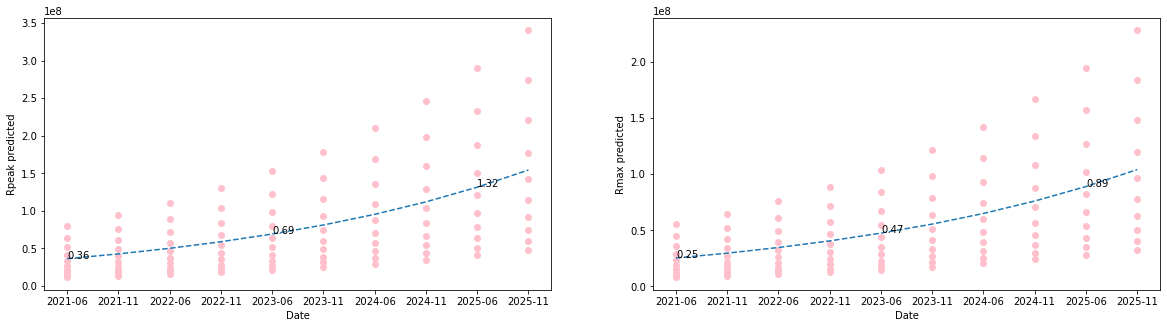

In [15]:
x, y_peak, y_max = [], [], []
for i in range(0,100,10):
    x.append(data_pred['Date'][i])
    y_peak.append(np.mean(data_pred['Rpeak'][i:i+10]))
    y_max.append(np.mean(data_pred['Rmax'][i:i+10]))

fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 2, 1)
plt.scatter(data_pred['Date'], data_pred['Rpeak'], c="pink")
plt.plot(x, y_peak, '--')
plt.text(x[0], y_peak[0], "{:.2f}".format(y_peak[0]/1e8))
plt.text(x[4], y_peak[4], "{:.2f}".format(y_peak[4]/1e8))
plt.text(x[8], y_peak[8], "{:.2f}".format(y_peak[8]/1e8))
plt.xlabel('Date')
plt.ylabel('Rpeak predicted')

fig.add_subplot(1, 2, 2)
plt.scatter(data_pred['Date'], data_pred['Rmax'], c="pink")
plt.plot(x, y_max, '--')
plt.text(x[0], y_max[0], "{:.2f}".format(y_max[0]/1e8))
plt.text(x[4], y_max[4], "{:.2f}".format(y_max[4]/1e8))
plt.text(x[8], y_max[8], "{:.2f}".format(y_max[8]/1e8))
plt.xlabel('Date')
plt.ylabel('Rmax predicted')